In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [205]:
Trump_twitter_data = pd.read_csv("final_f.csv", index_col = None, parse_dates = True)
Trump_twitter_data.day = pd.to_datetime(Trump_twitter_data.day)
Trump_twitter_data

,day,time,tweet,polarity,subjectivity,grade_level,retweets
0,2009-05-04,13:54,Be sure to tune in and watch Donald Trump on L...,0.175000,0.497222,6.74,510
1,2009-05-04,20:00,Donald Trump will be appearing on The View tom...,0.170455,0.454545,11.43,34
2,2009-05-08,08:38,Donald Trump reads Top Ten Financial Tips on L...,0.121250,0.420000,9.63,13
3,2009-05-08,15:40,New Blog Post: Celebrity Apprentice Finale and...,0.136364,0.454545,11.70,11
4,2009-05-12,09:07,"""My persona will never be that of a wallflower...",0.000000,0.000000,7.37,1375
...,...,...,...,...,...,...,...
43347,2020-06-17,19:00,Joe Biden was a TOTAL FAILURE in Government. H...,-0.197917,0.525000,10.74,23402
43348,2020-06-17,19:11,Will be interviewed on @ seanhannity tonight a...,0.500000,0.500000,9.66,11810
43349,2020-06-17,21:27,pic.twitter.com/3lm1spbU8X,0.000000,0.000000,88.00,4959
43350,2020-06-17,21:28,pic.twitter.com/vpCE5MadUz,0.000000,0.000000,88.00,4627


In [149]:
Trump_twitter_data.describe()

,polarity,subjectivity,retweets
count,43352.000000,43352.000000,43352.000000
mean,0.177708,0.423456,6264.766908
std,0.352333,0.310173,11120.363335
min,-1.000000,0.000000,0.000000
25%,0.000000,0.100000,27.000000
50%,0.100000,0.466667,396.500000
75%,0.400000,0.650000,10753.000000
max,1.000000,1.000000,302269.000000


In [304]:
df_obj_pol['pol_roll_ave']=df_obj_pol['polarity'].rolling(window=300).mean()
df_obj_pol['subj_roll_ave']=df_obj_pol['subjectivity'].rolling(window=300).mean()
df_obj_pol['retweets_roll_ave']=df_obj_pol['retweets'].rolling(window=300).mean()
df_obj_pol

,day,time,polarity,subjectivity,retweets,pol_roll_ave,subj_roll_ave,retweets_roll_ave
0,2009-05-04,13:54,0.175000,0.497222,510,NaN,NaN,NaN
1,2009-05-04,20:00,0.170455,0.454545,34,NaN,NaN,NaN
2,2009-05-08,08:38,0.121250,0.420000,13,NaN,NaN,NaN
3,2009-05-08,15:40,0.136364,0.454545,11,NaN,NaN,NaN
4,2009-05-12,09:07,0.000000,0.000000,1375,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,2020-06-17,19:00,-0.197917,0.525000,23402,0.159256,0.417387,27308.800000
43348,2020-06-17,19:11,0.500000,0.500000,11810,0.160046,0.417059,27319.240000
43349,2020-06-17,21:27,0.000000,0.000000,4959,0.159199,0.415142,27289.460000
43350,2020-06-17,21:28,0.000000,0.000000,4627,0.159127,0.413540,27274.356667


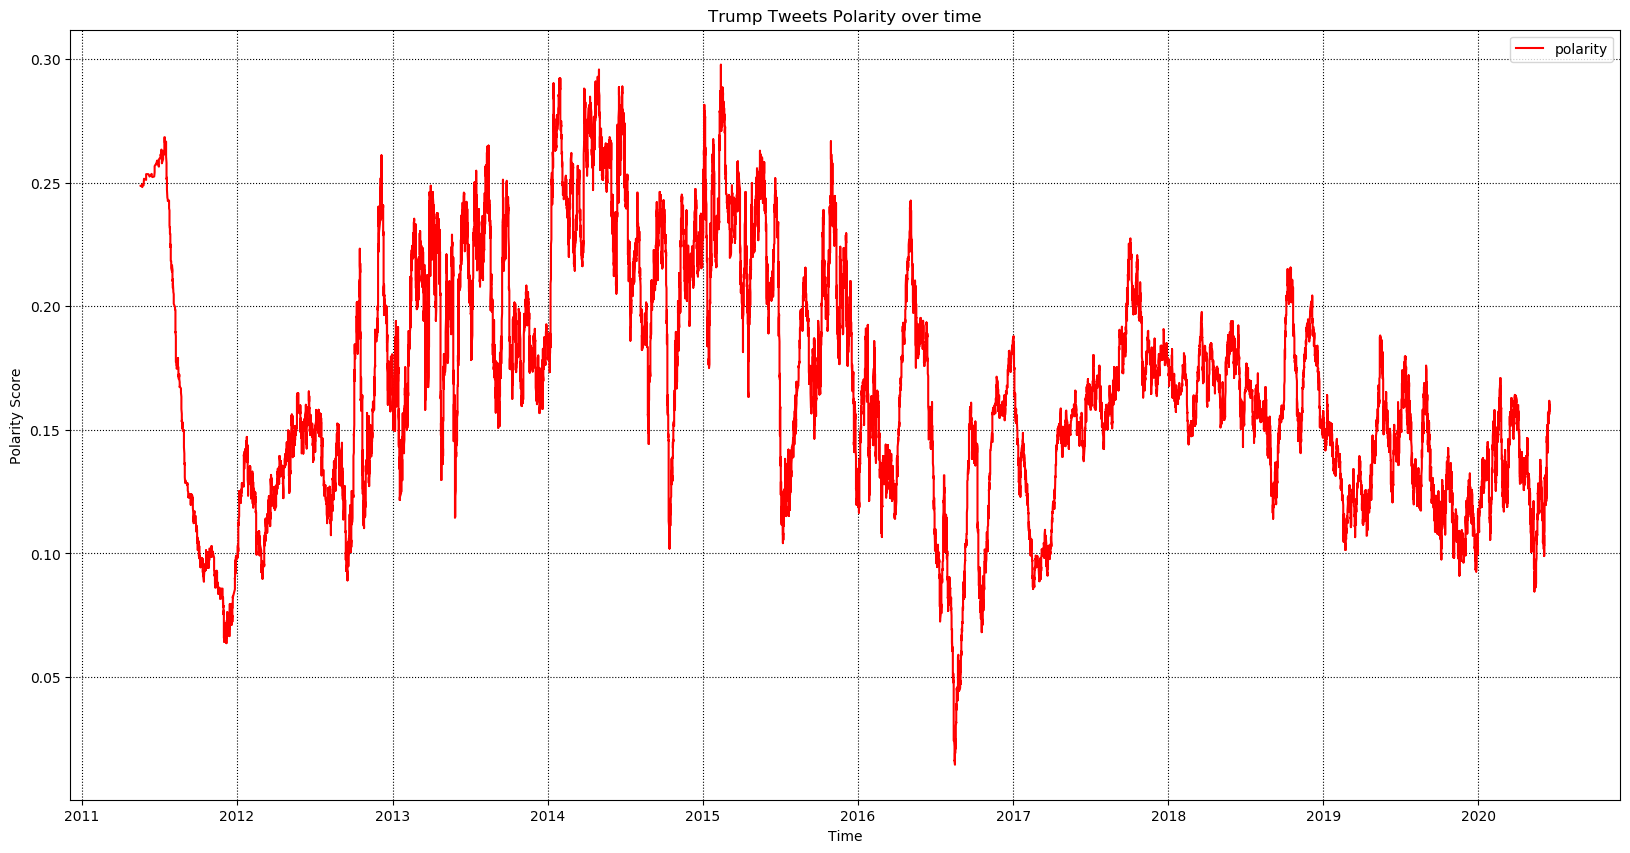

In [305]:
from matplotlib import rcParams
rcParams['figure.figsize']= 20,10
plt.plot(df_obj_pol.day, df_obj_pol.pol_roll_ave, label='polarity', color='r')
#plt.plot(df_obj_pol.subj_roll_ave, label='subjectivity')
plt.grid(True, color='k', linestyle=':')
plt.xlabel("Time")
plt.ylabel("Polarity Score")
#plt.ylim()
#plt.yticks([-1,-.75,-.5,-.25,0,.25,.5,.75,1])
plt.title('Trump Tweets Polarity over time')
#plt.style.use('ggplot')
plt.style.use('default')
plt.legend(loc=1);

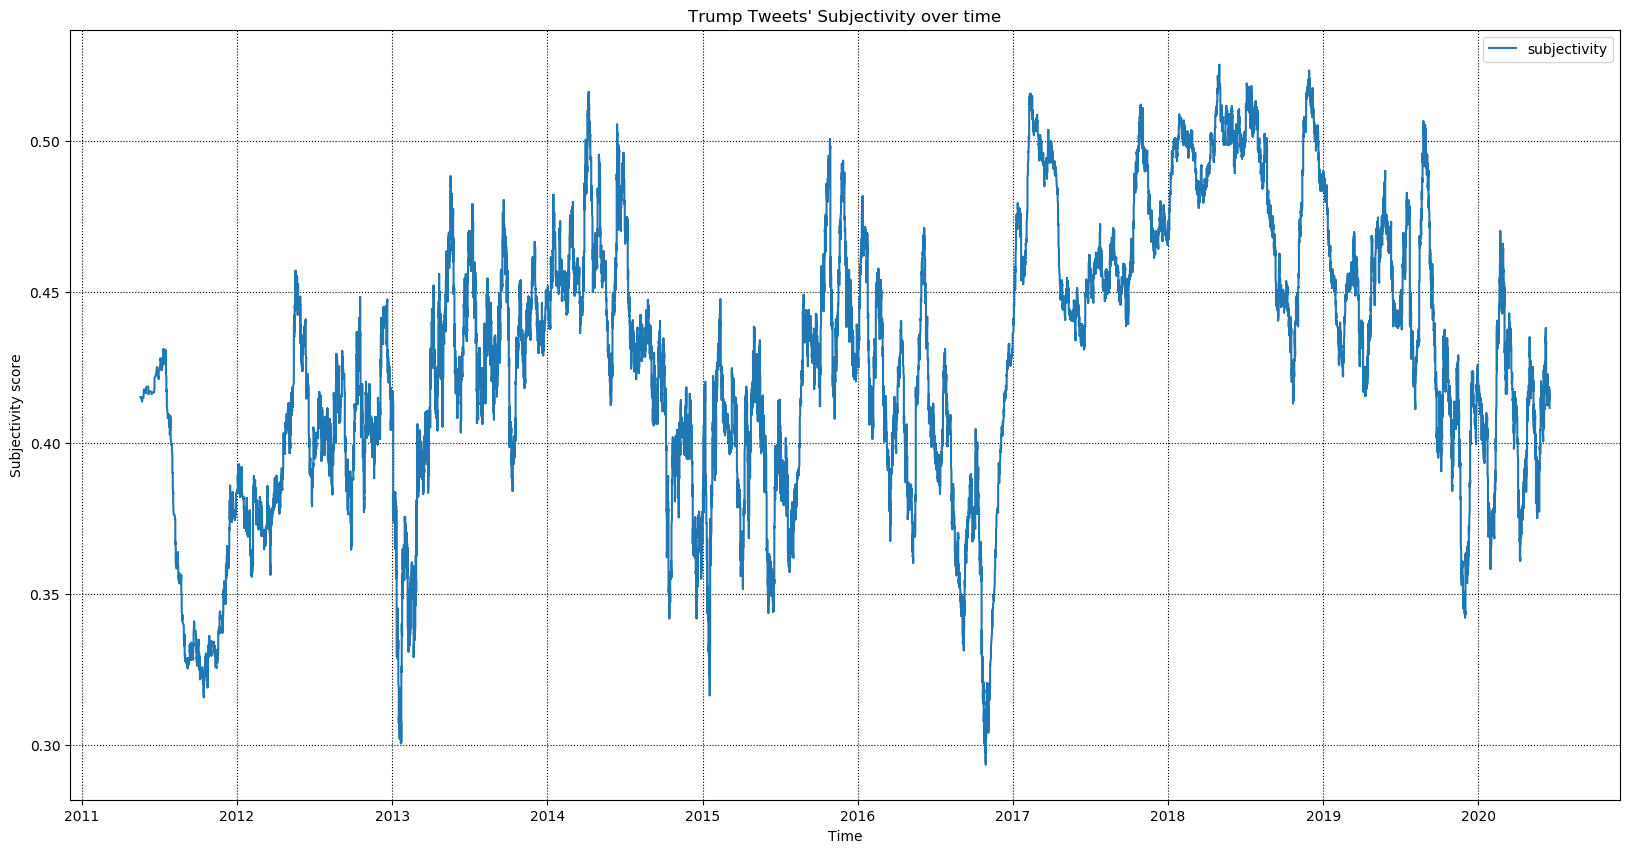

In [292]:
rcParams['figure.figsize']= 20,10
#plt.plot(df_obj_pol.pol_roll_ave, label='polarity')
plt.plot(df_obj_pol.day, df_obj_pol.subj_roll_ave, label='subjectivity')
plt.grid(True, color='k', linestyle=':')
plt.xlabel("Time")
plt.ylabel("Subjectivity score")
#plt.ylim()
#plt.yticks([5,10,15,20])
plt.title('Trump Tweets\' Subjectivity over time', color='k')
#plt.style.use('ggplot')
plt.style.use('default')
plt.legend(loc=1);

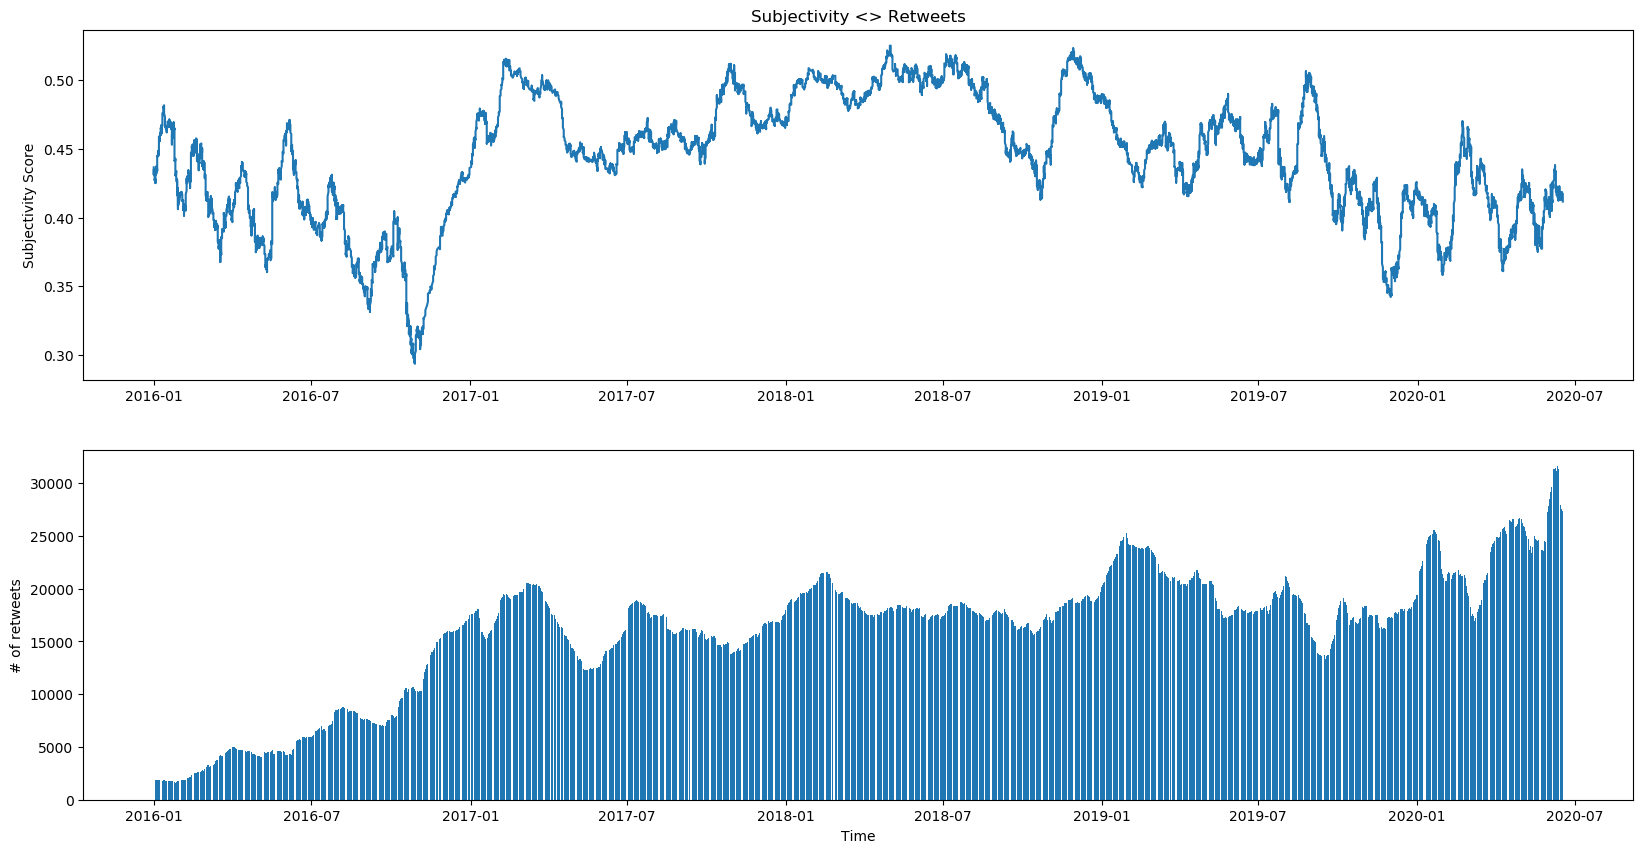

In [294]:
rcParams['figure.figsize']= 20,10

df_use = df_obj_pol[df_obj_pol['day']>= '2016-01-01']
x1 = df_use.day
x2 = df_use.day

y1 = df_use.subj_roll_ave
y2 = df_use.retweets_roll_ave

plt.subplot(2, 1, 1)
plt.plot(x1, y1)
plt.title('Subjectivity <> Retweets')
plt.ylabel('Subjectivity Score')
#plt.axvline(dt.datetime(2019, 1, 1), linestyle='--', color='black')
plt.subplot(2, 1, 2)
plt.bar(x2, y2)
plt.xlabel('Time')
plt.ylabel('# of retweets')
#plt.axvline(dt.datetime(2019, 1, 1), linestyle='--', color='black')

plt.show()

In [161]:
Trump_twitter_data_2020 = Trump_twitter_data[Trump_twitter_data['day'] >= '2020-01-01']

In [163]:
Trump_twitter_data_2020.describe()

,polarity,subjectivity,retweets
count,2413.000000,2413.000000,2413.000000
mean,0.131655,0.406244,24163.141318
std,0.318316,0.304475,17358.686807
min,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,13065.000000
50%,0.005682,0.468155,19279.000000
75%,0.300000,0.630000,29570.000000
max,1.000000,1.000000,224890.000000


In [288]:
Trump_twitter_data_2020['pol_roll_ave']=Trump_twitter_data_2020['polarity'].rolling(window=30).mean()
Trump_twitter_data_2020['subj_roll_ave']=Trump_twitter_data_2020['subjectivity'].rolling(window=30).mean()
#df_obj_pol['retweets_roll_ave']=df_obj_pol['retweets'].rolling(window=100).mean()
Trump_twitter_data_2020

/Users/placidegatabazi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/placidegatabazi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day,time,tweet,polarity,subjectivity,retweets,pol_roll_ave,subj_roll_ave
40939,2020-01-01,19:32,Best equipment & finest military in the World....,0.450000,0.200000,18799,NaN,NaN
40940,2020-01-01,19:36,"Too bad, Corey would have won! He (and I) love...",-0.369318,0.560606,8762,NaN,NaN
40941,2020-01-01,19:46,Canât believe @ ATT keeps the management aft...,0.000000,0.000000,17039,NaN,NaN
40942,2020-01-01,19:53,Great job!https://twitter.com/TrumpWarRoom/sta...,0.800000,0.750000,14239,NaN,NaN
40943,2020-01-01,20:46,They donât know how to do that!https://twitt...,0.000000,0.000000,15270,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,2020-06-17,19:00,Joe Biden was a TOTAL FAILURE in Government. H...,-0.197917,0.525000,23402,0.094532,0.331153
43348,2020-06-17,19:11,Will be interviewed on @ seanhannity tonight a...,0.500000,0.500000,11810,0.096199,0.322403
43349,2020-06-17,21:27,pic.twitter.com/3lm1spbU8X,0.000000,0.000000,4959,0.096199,0.322403
43350,2020-06-17,21:28,pic.twitter.com/vpCE5MadUz,0.000000,0.000000,4627,0.089532,0.315736


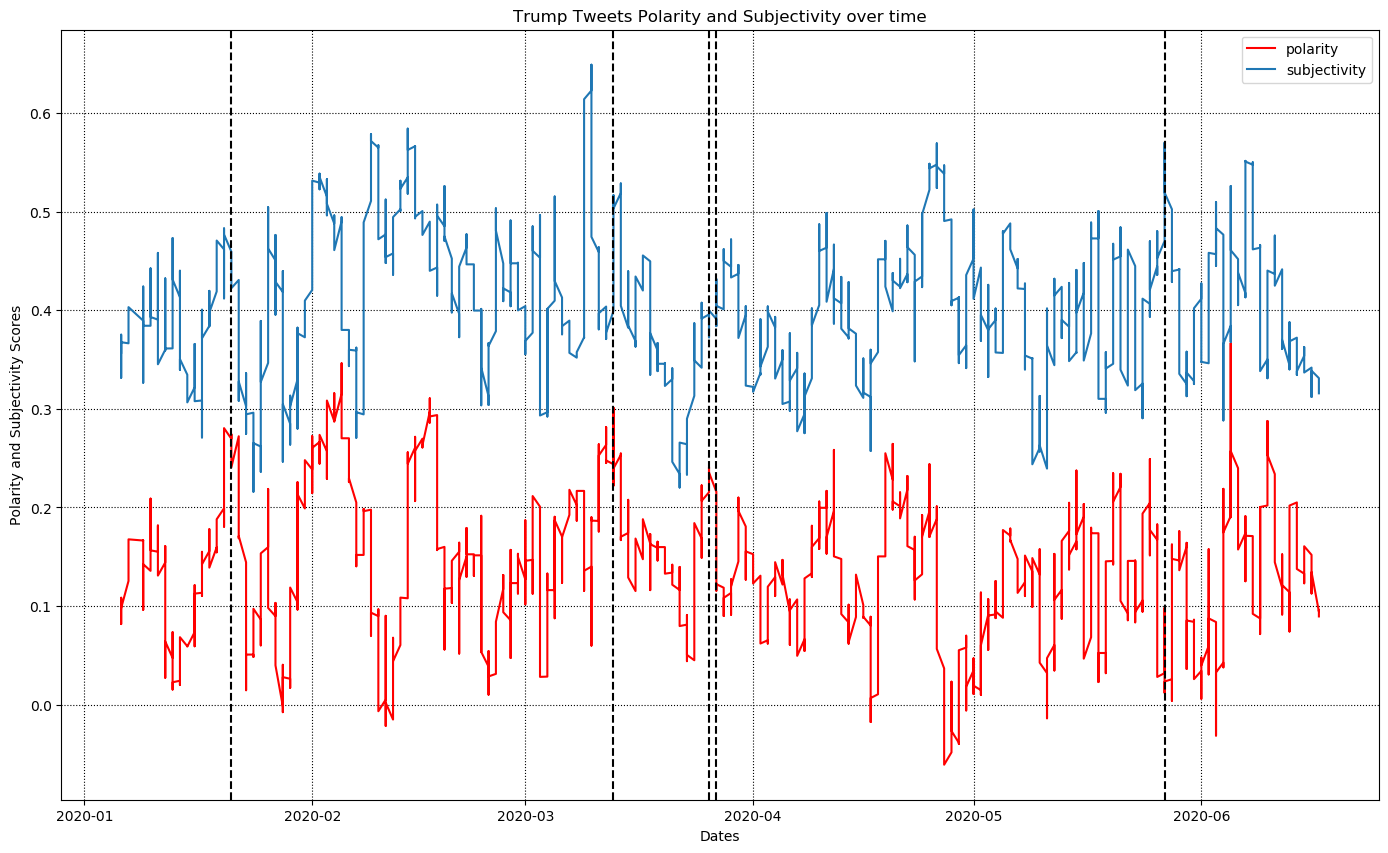

In [298]:
from matplotlib import rcParams
rcParams['figure.figsize']= 17,10



plt.plot(Trump_twitter_data_2020.day, Trump_twitter_data_2020.pol_roll_ave, label='polarity', color='r')
plt.plot(Trump_twitter_data_2020.day, Trump_twitter_data_2020.subj_roll_ave, label='subjectivity')
plt.grid(True, color='k', linestyle=':')
plt.xlabel("Dates")
plt.ylabel("Polarity and Subjectivity Scores")
#plt.ylim()
#plt.yticks([-1,-.75,-.5,-.25,0,.25,.5,.75,1])
plt.title('Trump Tweets Polarity and Subjectivity over time')
#plt.style.use('ggplot')
plt.style.use('default')
plt.legend(loc=1)
plt.axvline(dt.datetime(2020, 1, 21), linestyle='--', color='black') # 1st confirmed case in the United States
#plt.axvline(dt.datetime(2020, 2, 26), linestyle='--', color='black') # 1st case of suspected local transmission in United States
#plt.axvline(dt.datetime(2020, 2, 29), linestyle='--', color='black') # 1st death reported in United States
plt.axvline(dt.datetime(2020, 3, 13), linestyle='--', color='black') # Trump declares national emergency
#plt.axvline(dt.datetime(2020, 3, 17), linestyle='--', color='black') # Coronavirus now present in all 50 states & Northern Californians ordered to 'shelter in place'
#plt.axvline(dt.datetime(2020, 3, 20), linestyle='--', color='black') # New York City declared US outbreak epicenter
plt.axvline(dt.datetime(2020, 3, 26), linestyle='--', color='black') # United States leads the world in COVID-19 cases
plt.axvline(dt.datetime(2020, 3, 27), linestyle='--', color='black') # Trump signs $2 trillion stimulus bill
plt.axvline(dt.datetime(2020, 5, 27), linestyle='--', color='black') # US reaches 100,000 deaths

#plt.axvline(Trump_twitter_data_2020.day == '2020-02-29');